In [1]:
import pandas as pd

In [2]:
pd.to_datetime("2019-12-31")

Timestamp('2019-12-31 00:00:00')

In [3]:
pd.to_datetime("2019/12/31")

Timestamp('2019-12-31 00:00:00')

In [4]:
pd.to_datetime("December 31st 2019")

Timestamp('2019-12-31 00:00:00')

In [5]:
pd.to_datetime("December 31st 2019 4pm")

Timestamp('2019-12-31 16:00:00')

In [6]:
pd.to_datetime("December 31st 2019 4:50am")

Timestamp('2019-12-31 04:50:00')

In [7]:
pd.to_datetime("Dec. 25 1990 12pm")

Timestamp('1990-12-25 12:00:00')

In [8]:
dates = ["3:55:45 Apr. 2nd 90", "3:55:45 Apr. 22nd 91", "7:55:45 Jan. 2nd 90"]
pd.to_datetime(dates)

DatetimeIndex(['1990-04-02 03:55:45', '1991-04-22 03:55:45',
               '1990-01-02 07:55:45'],
              dtype='datetime64[ns]', freq=None)

In [9]:
pd.to_datetime("10/11/12")

Timestamp('2012-10-11 00:00:00')

In [10]:
pd.to_datetime("10/11/12", dayfirst=True)

Timestamp('2012-11-10 00:00:00')

In [11]:
pd.to_datetime("10/11/12", yearfirst=True)

Timestamp('2010-11-12 00:00:00')

In [12]:
pd.to_datetime("10/11/12", yearfirst=True, dayfirst=True)

Timestamp('2010-12-11 00:00:00')

In [13]:
pd.to_datetime("10/11/12", format="%y/%m/%d")

Timestamp('2010-11-12 00:00:00')

In [14]:
meeting = ["Dec 11 2019 Meeting", "Jan 6 2020 Meeting"]


In [15]:
pd.to_datetime(meeting, format="%b %d %Y Meeting")

DatetimeIndex(['2019-12-11', '2020-01-06'], dtype='datetime64[ns]', freq=None)

In [16]:
ufos = pd.read_csv("data/nuforc_reports.csv")

In [17]:
ufos["date"] = pd.to_datetime(ufos["date_time"])

In [18]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87891 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  object        
 4   shape           85627 non-null  object        
 5   duration        84954 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
 12  date            86938 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 8.7+ MB


In [19]:
ufos = pd.read_csv("data/nuforc_reports.csv", parse_dates=['date_time'])

In [20]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87891 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84954 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


<AxesSubplot:>

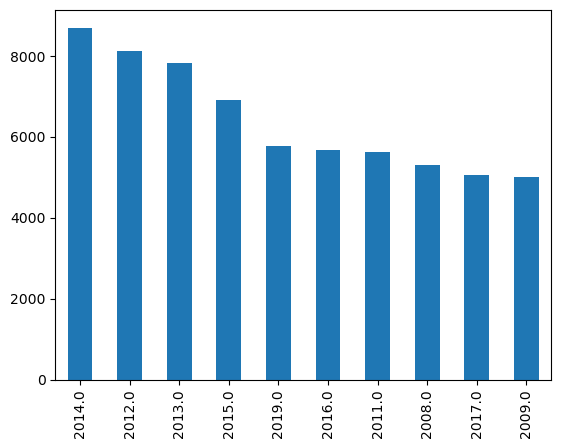

In [21]:
ufos["date_time"].dt.year.value_counts().head(10).plot(kind="bar")

In [22]:
ufos["date_time"].dt.month.value_counts()

7.0     10682
8.0      8997
9.0      8498
10.0     8371
6.0      8357
11.0     7596
12.0     6525
5.0      6063
1.0      5979
4.0      5817
3.0      5494
2.0      4559
Name: date_time, dtype: int64

<AxesSubplot:>

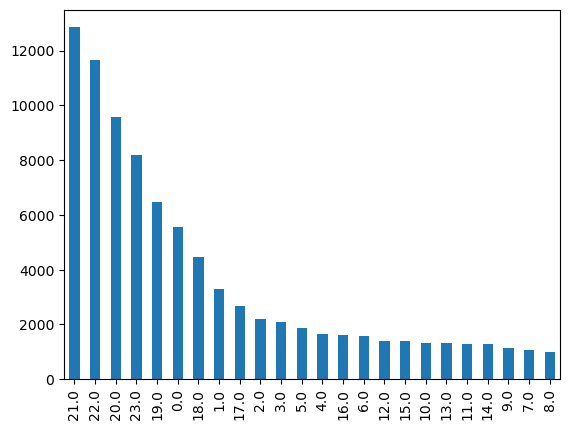

In [23]:
ufos["date_time"].dt.hour.value_counts().plot(kind="bar")

In [24]:
ufos["date_time"].dt.dayofweek.value_counts()

5.0    16305
4.0    12864
6.0    12652
3.0    11729
2.0    11646
1.0    10987
0.0    10755
Name: date_time, dtype: int64

In [25]:
ufos["posted"] = pd.to_datetime(ufos["posted"])

In [27]:
ufos["time_before_reported"] = ufos["posted"] - ufos["date_time"]

In [30]:
longest_wait = ufos.sort_values("time_before_reported", ascending=False)

In [32]:
longest_wait["time_before_reported"].dt.days / 365

86762    50.583562
87145    50.282192
721      50.175342
1576     50.101370
1580     49.972603
           ...    
87935          NaN
87936          NaN
87937          NaN
87938          NaN
87939          NaN
Name: time_before_reported, Length: 88125, dtype: float64

In [33]:
ufos["days_before_reporting"] = ufos["time_before_reported"].dt.days

In [34]:
ufos

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,time_before_reported,days_before_reporting
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,9 days 05:17:00,9.0
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300,6 days 05:30:00,6.0
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaT,NaN,NaN,NaT,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18,45.381383,-75.708501,0 days 22:00:00,0.0
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18,NaN,NaN,3685 days 06:00:00,3685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04,33.414036,-111.920920,1 days 04:00:00,1.0
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04,37.642200,-93.399600,1 days 04:00:00,1.0
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04,27.076210,-82.223280,1 days 03:57:00,1.0
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04,35.605000,-82.313200,1 days 02:00:00,1.0


In [36]:
charts = pd.read_csv("data/billboard_charts.csv", parse_dates=["date"])

<AxesSubplot:>

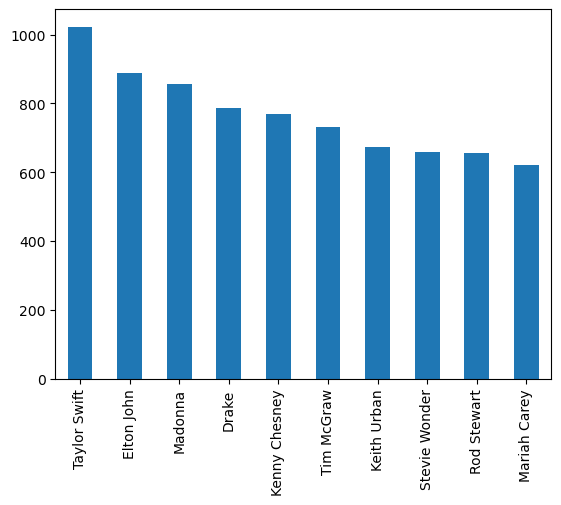

In [38]:
charts["artist"].value_counts().head(10).plot(kind="bar")

In [39]:
number_ls = charts["rank"] == 1

<AxesSubplot:>

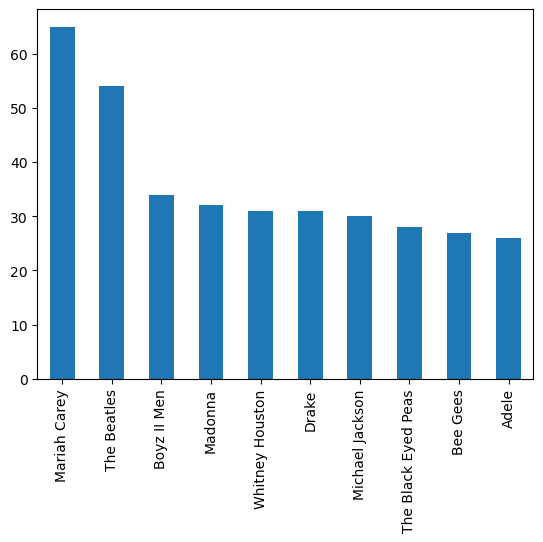

In [45]:
charts[number_ls]["artist"].value_counts().head(10).plot(kind="bar")

In [46]:
charts[number_ls]["song"].value_counts()

Old Town Road                               19
Despacito                                   16
One Sweet Day                               16
Rockstar                                    15
I'll Make Love To You                       14
                                            ..
Then Came You                                1
You Haven't Done Nothin                      1
You Ain't Seen Nothing Yet/Free Wheelin'     1
Whatever Gets You Thru The Night             1
I'll Take You There                          1
Name: song, Length: 1104, dtype: int64

<AxesSubplot:xlabel='date'>

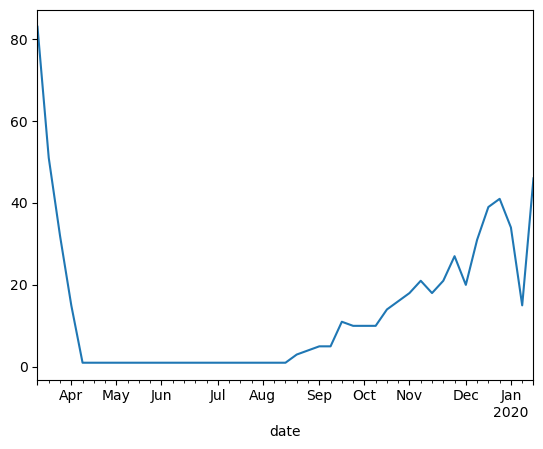

In [51]:
charts[charts["song"] == "Old Town Road"].set_index('date')["rank"].plot()

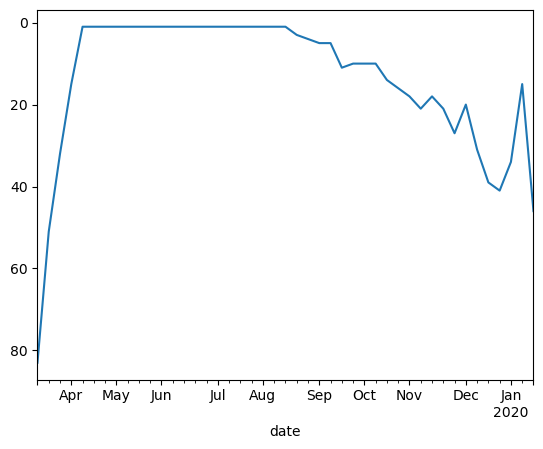

In [52]:
charts[charts["song"] == "Old Town Road"].set_index('date')["rank"].plot().invert_yaxis()

In [57]:
house = pd.read_csv("data/kc_house_data.csv", parse_dates=['date'])

In [67]:
house['date'].max() - house['date'].min()

Timedelta('390 days 00:00:00')

In [76]:
p = house["date"].mode()[0]
house[house['date']==p]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
117,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,...,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780
397,5175800060,2014-06-23,365000.0,4,2.00,1940,25600,1.0,0,0,...,8,1940,0,1962,0,98006,47.5722,-122.129,2000,10071
470,2172000075,2014-06-23,290900.0,2,2.00,1610,17600,2.0,0,0,...,6,1610,0,1930,1983,98178,47.4855,-122.266,1310,12950
621,3010300240,2014-06-23,577000.0,3,2.50,2060,5750,1.0,0,0,...,7,1330,730,1976,0,98116,47.5671,-122.391,1920,5750
676,7846700310,2014-06-23,280000.0,2,1.00,1010,3000,1.0,0,0,...,7,1010,0,1925,0,98045,47.4965,-121.785,1150,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21230,3629990280,2014-06-23,497000.0,3,2.25,1630,3817,2.0,0,0,...,7,1630,0,2005,0,98029,47.5485,-121.999,1630,3348
21479,6181500120,2014-06-23,312891.0,5,3.00,2300,8214,2.0,0,0,...,8,2300,0,2013,0,98001,47.3052,-122.276,2594,4950
21529,2487200490,2014-06-23,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
21578,567000385,2014-06-23,362500.0,2,1.50,940,1768,2.0,0,0,...,7,940,0,2009,0,98144,47.5925,-122.295,1130,1159


<AxesSubplot:ylabel='date'>

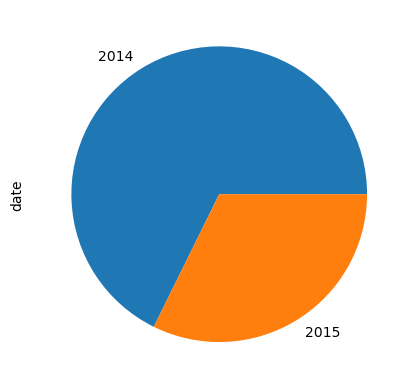

In [95]:
house[(house['date'].dt.year==2014) | (house['date'].dt.year==2015)]['date'].dt.year.value_counts().plot(kind='pie')

In [98]:
house[house['date'].dt.year==2014].sort_values("date")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11907,3221059036,2014-05-02,400000.0,4,2.50,3630,42884,1.5,0,0,...,9,2300,1330,1979,0,98092,47.2617,-122.190,2830,80148
20559,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
17038,2326059099,2014-05-02,838000.0,4,2.50,3310,42998,2.0,0,0,...,9,3310,0,2001,0,98052,47.7232,-122.131,3350,42847
15921,7831800460,2014-05-02,235000.0,2,1.00,1210,9400,1.0,0,0,...,6,1210,0,1949,0,98106,47.5342,-122.360,1580,6026
11891,7305300695,2014-05-02,625000.0,4,2.50,2820,8408,2.0,0,0,...,9,2820,0,2014,0,98155,47.7538,-122.325,1300,8408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,7701990700,2014-12-31,825000.0,4,2.50,3210,18901,2.0,0,0,...,10,3210,0,1993,0,98077,47.7090,-122.073,3330,18901
8393,2493200215,2014-12-31,582000.0,3,1.75,1820,3140,2.0,0,0,...,8,1820,0,1949,1990,98136,47.5271,-122.384,2030,5499
18462,7345200650,2014-12-31,219200.0,3,2.00,1680,7000,1.5,0,0,...,7,1680,0,1968,0,98002,47.2775,-122.203,1540,7480
9850,8861000060,2014-12-31,875000.0,3,1.00,1160,10732,1.0,0,0,...,7,1160,0,1953,0,98004,47.6391,-122.205,2390,13656


In [136]:
one_year = house[house["date"].between("2014-05-01", "2015-05-01")].sort_values("date")

<AxesSubplot:>

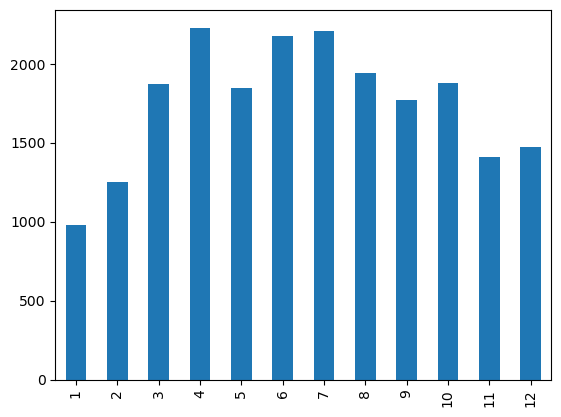

In [138]:
one_year["date"].dt.month.value_counts().sort_index().plot(kind='bar')

In [142]:
house['date'].dt.dayofweek.value_counts()

1    4715
2    4603
0    4099
3    3994
4    3685
5     287
6     230
Name: date, dtype: int64

<AxesSubplot:>

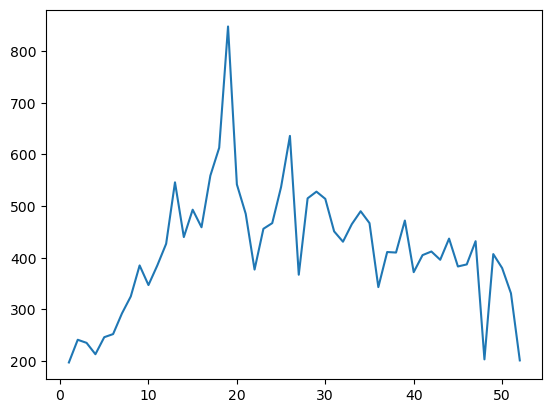

In [148]:
house['date'].dt.isocalendar().week.value_counts().sort_index().plot()

<AxesSubplot:>

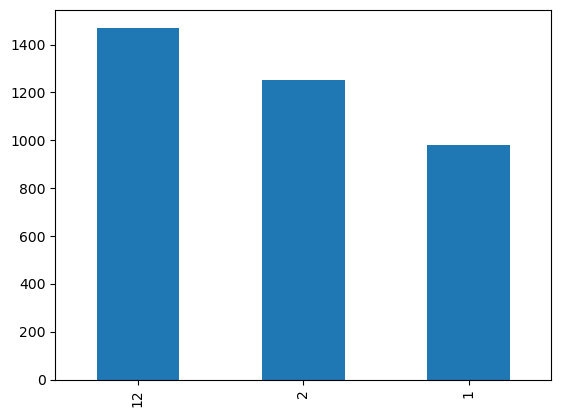

In [181]:
house[house['date'].dt.month.isin([12,1,2])]['date'].dt.month.value_counts().plot(kind='bar')

In [188]:
df = house[house["date"].between("2014-05-01", "2015-05-01")]
df = df[df["waterfront"]==1]

<AxesSubplot:>

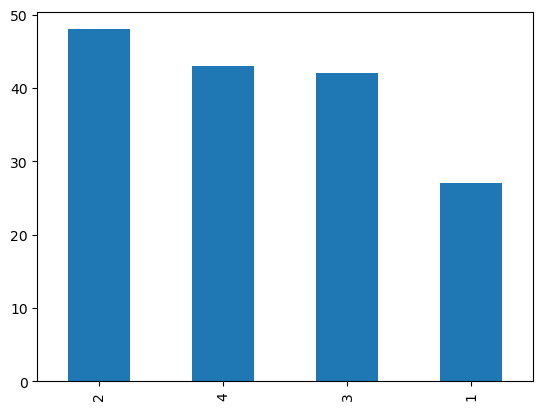

In [193]:
df['date'].dt.quarter.value_counts().plot(kind='bar')